# Regression Tree


## Regular Training (with popularity scores of 0)

### Setup

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils_io import load_step, save_step
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV


In [ ]:

X_train = load_step("X_train")
X_test = load_step("X_test")
y_train = load_step("y_train")
y_test = load_step("y_test")

X_train_scaled = load_step("X_train_scaled")
X_test_scaled = load_step("X_test_scaled")

### Random Forest with Regression Trees

#### Random Forest -Unscaled Data-

In [13]:
# Random Forest Regressor 
rf = RandomForestRegressor(
    n_estimators=400,        # number of trees
    max_depth=40,           
#    min_samples_split=3,     # min samples to split
    min_samples_leaf=1,      # min samples per leaf
    max_features=15,     # features per split
    random_state=42,
    n_jobs=-1
)

# train
rf.fit(X_train, y_train)

# pred
y_pred = rf.predict(X_test)

# performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest MSE: {mse:.2f}")
print(f"Random Forest R²: {r2:.3f}")

# feature importance
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)
print("\nTop 10 Important Features:")
print(importances.head(10))

/Users/clari/datamining_group12/venv/lib/python3.14/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest MSE: 265.60
Random Forest R²: 0.369

Top 10 Important Features:
acousticness        0.080017
duration_ms         0.077011
danceability        0.073715
loudness            0.070779
speechiness         0.069962
valence             0.069479
energy              0.068659
tempo               0.063418
instrumentalness    0.062656
liveness            0.058459
dtype: float64


#### Random Forest -Scaled Data-

In [14]:

rf_scaled = RandomForestRegressor(
    n_estimators=400,        # number of trees
    max_depth=40,            
#    min_samples_split=3,     # min samples to split
    min_samples_leaf=1,      # min samples per leaf
    max_features=15,     # features per split
    random_state=42,
    n_jobs=-1
)

# train
rf_scaled.fit(X_train_scaled, y_train)

# pred
y_pred_scaled = rf_scaled.predict(X_test_scaled)

# performance
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f"Random Forest (scaled) MSE: {mse_scaled:.2f}")
print(f"Random Forest (scaled) R²: {r2_scaled:.3f}")

# feature importance
importances_scaled = pd.Series(rf_scaled.feature_importances_, index=X_train_scaled.columns)
importances_scaled = importances_scaled.sort_values(ascending=False)
print("\nTop 10 wichtige Features (scaled):")
print(importances_scaled.head(10))

/Users/clari/datamining_group12/venv/lib/python3.14/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest (scaled) MSE: 265.60
Random Forest (scaled) R²: 0.369

Top 10 wichtige Features (scaled):
acousticness        0.080017
duration_ms         0.077011
danceability        0.073715
loudness            0.070779
speechiness         0.069962
valence             0.069479
energy              0.068659
tempo               0.063418
instrumentalness    0.062656
liveness            0.058459
dtype: float64


### Regression Tree

#### Regression tree -Unscaled Data-

In [15]:
# Initialize Regressor
regressor = DecisionTreeRegressor(max_depth=16, min_samples_split=8, min_samples_leaf=80) # Before Optimization: none, 20, 20 #

# Fitting the Regressor
regressor.fit(X_train, y_train)

# Predict the Popularity
y_pred = regressor.predict(X_test)

# What do the metrics say about our model?
print
print(f"Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print(f"Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print(f"R²: ", r2_score(y_test, y_pred))

# --- Before Optimization---  #

# Mean Squared Error:  366.9908745841802
# Mean Absolute Error:  14.545597567963474
# R²:  0.12762439147810323

# --- After Optimization---  #

# Mean Squared Error:  345.68702352872225
# Mean Absolute Error:  14.435585852955738
# R²:  0.17826586873396877

Mean Squared Error:  345.68702352872225
Mean Absolute Error:  14.435585852955738
R²:  0.17826586873396877


#### Regression tree -Scaled Data-

In [16]:
# Initialize Regressor
regressor = DecisionTreeRegressor(max_depth=16, min_samples_split=80, min_samples_leaf=8) # Before Optimization: none, 20, 20 #

# Fitting the Regressor
regressor.fit(X_train_scaled, y_train)

# Predict the Popularity
y_pred_scaled = regressor.predict(X_test_scaled)

# What do the metrics say about the model?
print(f"Mean Squared Error: ", mean_squared_error(y_test, y_pred_scaled))
print(f"Mean Absolute Error: ", mean_absolute_error(y_test, y_pred_scaled))
print(f"R²: ", r2_score(y_test, y_pred))

# --- Before Optimization---  #
# Mean Squared Error:  366.9908745841802
# Mean Absolute Error:  14.545597567963474
# R²:  0.12762439147810323

# --- After Optimization---  #
# Mean Squared Error:  345.68702352872225
# Mean Absolute Error:  14.435585852955738
# R²:  0.17826586873396877

Mean Squared Error:  347.3112237500522
Mean Absolute Error:  14.275182403918139
R²:  0.17826586873396877


### Visualization - Random forest

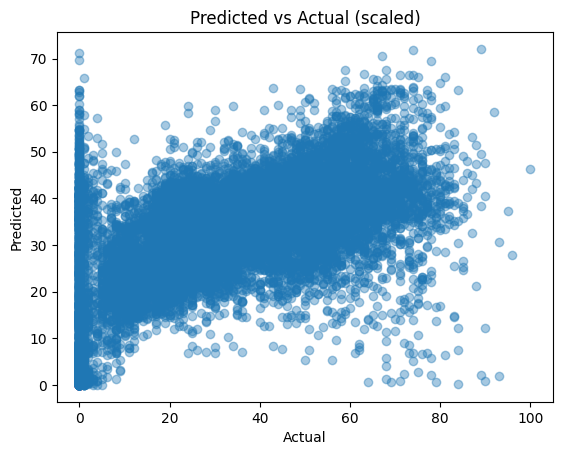

In [17]:
# How did we do?
y_pred_scaled = rf_scaled.predict(X_test_scaled)

plt.scatter(y_test, y_pred_scaled, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual (scaled)")
plt.show()

### Visualization - Regression tree

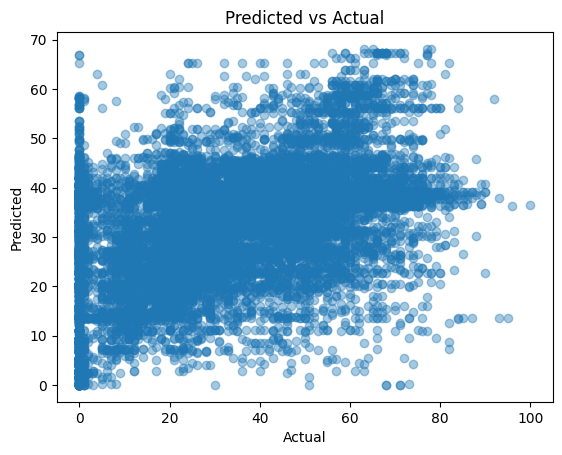

In [18]:
# How did we do?
y_pred = regressor.predict(X_test_scaled)

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.show()

## Hyperparameter Optimization

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 1) Define the base model (no min_samples_split tuned)
base_tree = DecisionTreeRegressor(
    random_state=42
)

# 2) Define the hyperparameter search space
param_dist = {
    "max_depth": [None, 3, 5, 7, 9],
    "min_samples_leaf": [5, 10, 20, 50, 100, 200]
}

# 3) Cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 4) Random search (neg MSE because sklearn wants "higher is better")
rand_search = RandomizedSearchCV(
    estimator=base_tree,
    param_distributions=param_dist,
    n_iter=30,                          # number of random configs to try
    scoring="neg_mean_squared_error",   # or "r2" if you prefer
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# 5) Run the search
rand_search.fit(X_train_scaled, np.ravel(y_train))

print("Best params:", rand_search.best_params_)
print("Best CV score (neg MSE):", rand_search.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params: {'min_samples_leaf': 100, 'max_depth': None}
Best CV score (neg MSE): -352.47103187254135


In [ ]:

# 6) Evaluate the best model on the test set
best_tree = rand_search.best_estimator_

y_pred_test = best_tree.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_test)
r2  = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))


print("\n=== Test set performance of best random-search tree ===")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"R²:                  {r2:.4f}")


=== Test set performance of best random-search tree ===
Mean Absolute Error: 14.4528
  RMSE: 18.6013
R²:                  0.1775


In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import randint, uniform

# -----------------------------------------------
# HYPERPARAMETER OPTIMIZATION FOR RANDOM FOREST
# -----------------------------------------------

# ensure y is 1D
y_train_arr = np.ravel(y_train)
y_test_arr = np.ravel(y_test)

# Parameter distributions for RANDOM SEARCH
param_dist = {
    "max_depth": [None, 3, 5, 7, 9],  # None + depths {5, 10, 15, 20, 25, 30, 35, 40}
    "min_samples_leaf": [5, 10, 20, 50, 100, 200],        # smaller leaves good for RF
    "max_features": uniform(loc=0.1, scale=0.9),  # consistent with sklearn RF "auto", "sqrt", 0.2, 0.5, 0.8
}

# 5-Fold CV
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(n_estimators=50, min_samples_split=2, random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=200,                             # Number of random combinations to try
    scoring="neg_mean_squared_error",
    cv=cv,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

#print("Running Random Search for Random Forest...")
random_search.fit(X_train_scaled, y_train_arr)

print("\nBest params:", random_search.best_params_)
print("Best CV score (neg MSE):", random_search.best_score_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END max_depth=9, max_features=0.6371651421518383, min_samples_leaf=10; total time=   9.8s
[CV] END max_depth=9, max_features=0.6371651421518383, min_samples_leaf=10; total time=   9.9s
[CV] END max_depth=9, max_features=0.6371651421518383, min_samples_leaf=10; total time=  10.0s
[CV] END max_depth=9, max_features=0.6371651421518383, min_samples_leaf=10; total time=  10.1s
[CV] END max_depth=9, max_features=0.6371651421518383, min_samples_leaf=10; total time=  10.7s
[CV] END max_depth=7, max_features=0.9556428757689246, min_samples_leaf=20; total time=  11.3s
[CV] END max_depth=5, max_features=0.18997742423620262, min_samples_leaf=20; total time=   1.4s
[CV] END max_depth=5, max_features=0.18997742423620262, min_samples_leaf=20; total time=   1.2s
[CV] END max_depth=7, max_features=0.9556428757689246, min_samples_leaf=20; total time=  11.3s
[CV] END max_depth=5, max_features=0.18997742423620262, min_samples_leaf=20; to

In [42]:

# 6) Evaluate the best model on the test set
best_forest = random_search.best_estimator_

y_pred_test = best_forest.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_test)
r2  = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))


print("\n=== Test set performance of best random-search tree ===")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"R²:                  {r2:.4f}")


=== Test set performance of best random-search tree ===
Mean Absolute Error: 12.5926
  RMSE: 16.6467
R²:                  0.3413
